In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

# Задача
1. Изучите предлагаемый датасет. (лист Sheet1)
2. Постройте на датасете 2 предиктивные модели. Поле target и target 2 - целевые переменные
3. Составьте простой отчёт о моделях, напишите краткое заключение
4. Необязательно, но будет плюсом: добавьте графики; сделайте предположения о смысле некоторых переменных

### Результат должен включать Jupyter notebook с ходом построения модели и краткую аналитическую записку (либо выводы комментами прямо в ноутбуке)


In [2]:
os.getcwd()

'D:\\projects\\test_task_idf'

In [3]:
data = pd.read_excel('task_for_junior.xlsx', index_col='id')

In [4]:
data.head()

,date,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,target,target2
id,,,,,,,,,,,,,,,,,,,,,
1,2022-05-25,1.0,30000.0,AUTONOMIC,2300.0,49.0,3,0.750000,1425.0,834.0,...,4.0,15.0,-0.398401,-0.917211,-0.909632,0.415415,-0.406737,0.913545,0,-3401
2,2022-04-02,NaN,NaN,NaN,NaN,NaN,1,0.500000,1049.0,29699.0,...,2.0,50.0,-0.398401,-0.917211,-0.909632,0.415415,-0.406737,0.913545,1,-2029
3,2022-03-19,0.0,60000.0,AUTONOMIC,500.0,48.0,1,0.500000,113.0,2022.0,...,2.0,93.0,-0.398401,-0.917211,-0.909632,0.415415,-0.406737,0.913545,0,-638
4,2022-04-15,1.0,10000.0,AUTONOMIC,2000.0,29.0,2,0.666667,107.0,950.0,...,3.0,11.0,-0.398401,-0.917211,-0.909632,0.415415,-0.406737,0.913545,0,-4209
5,2022-01-01,NaN,NaN,NaN,NaN,NaN,6,0.857143,119.0,200.0,...,17.0,92.0,-0.398401,-0.917211,-0.909632,0.415415,-0.406737,0.913545,1,-4314


In [5]:
data.describe()

,feat1,feat2,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,...,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,target,target2
count,16138.000000,1.613900e+04,1.613900e+04,16138.000000,20000.000000,20000.000000,18906.000000,18235.00000,20000.0,5722.000000,...,19773.000000,19773.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000
mean,0.454084,1.625167e+04,7.382806e+03,35.201016,1.263800,0.312696,756.551677,2458.82561,inf,10467.674240,...,2.561574,17.513073,-0.290266,-0.330310,-2.447069e-01,0.100441,-5.816672e-02,0.035289,0.275950,2487.235200
std,0.497903,7.790226e+04,9.954034e+04,9.905089,2.138232,0.336610,494.365862,10943.52586,NaN,21744.980236,...,3.270729,28.161409,0.614460,0.655073,4.489469e-01,0.853536,5.959262e-01,0.800183,0.447003,4320.902755
min,0.000000,5.000000e+00,0.000000e+00,18.000000,0.000000,0.000000,0.000000,0.00000,1.0,0.000000,...,1.000000,0.000000,-0.997669,-0.990686,-9.898214e-01,-0.959493,-9.985334e-01,-1.000000,0.000000,-4998.000000
25%,0.000000,8.000000e+03,2.000000e+03,28.000000,0.000000,0.000000,242.000000,16.00000,26.0,1100.000000,...,1.000000,9.000000,-0.887885,-0.917211,-5.406408e-01,-0.959493,-5.877853e-01,-0.856857,0.000000,-1257.250000
50%,0.000000,1.160000e+04,4.000000e+03,34.000000,0.000000,0.000000,800.000000,780.00000,51.0,3640.000000,...,2.000000,13.000000,-0.398401,-0.576680,-1.133108e-15,-0.142315,-1.133108e-15,0.104528,0.000000,2467.000000
75%,1.000000,1.600000e+04,6.500000e+03,41.000000,2.000000,0.666667,1247.000000,1920.00000,76.0,11199.500000,...,3.000000,16.000000,0.136167,0.203456,0.000000e+00,1.000000,4.067366e-01,0.913545,1.000000,6249.250000
max,1.000000,8.800000e+06,8.000899e+06,75.000000,33.000000,0.970588,1503.000000,566349.00000,inf,460400.000000,...,92.000000,838.000000,0.997669,1.000000,2.817326e-01,1.000000,9.945219e-01,1.000000,1.000000,10000.000000


Много пропусков в 2 фичах и инф значения в 1 фиче


In [6]:
data['target'].value_counts(normalize=True)

0    0.72405
1    0.27595
Name: target, dtype: float64

In [7]:
data['feat10'].value_counts().sort_values(ascending=True)

inf       4
26.0    161
72.0    168
25.0    173
39.0    173
       ... 
65.0    226
59.0    226
54.0    228
22.0    232
93.0    233
Name: feat10, Length: 101, dtype: int64

# Дроп фичей с пропусками более 95%

In [8]:
def drop_col_with_na_trsh(df, treshold=0.95):
    missing_count = df.isnull().mean()
    df_cleaned = df.loc[:, missing_count <= treshold]

    return df_cleaned


data = drop_col_with_na_trsh(data, 0.95)

# Заполнение пропусков -999 и 'unk'
# Удаление записей с inf в feat10, потому что их 4 среди 20к, будто какие-то неадекватные выбросы среди значений 1-100 можно попробовать проставить что-то оч большое но это сильно не должно повлиять

In [9]:
for col in data.columns:
    if data[col].dtype in ['float64', 'int64']:
        data[col].fillna(-999, inplace=True)
    if data[col].dtype == 'O':
        data[col].fillna('unk', inplace=True)
data = data[data['feat10'] != float('inf')]

In [10]:
display(data.head())
print(data.shape)

,date,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,target,target2
id,,,,,,,,,,,,,,,,,,,,,
1,2022-05-25,1.0,30000.0,AUTONOMIC,2300.0,49.0,3,0.750000,1425.0,834.0,...,4.0,15.0,-0.398401,-0.917211,-0.909632,0.415415,-0.406737,0.913545,0,-3401
2,2022-04-02,-999.0,-999.0,unk,-999.0,-999.0,1,0.500000,1049.0,29699.0,...,2.0,50.0,-0.398401,-0.917211,-0.909632,0.415415,-0.406737,0.913545,1,-2029
3,2022-03-19,0.0,60000.0,AUTONOMIC,500.0,48.0,1,0.500000,113.0,2022.0,...,2.0,93.0,-0.398401,-0.917211,-0.909632,0.415415,-0.406737,0.913545,0,-638
4,2022-04-15,1.0,10000.0,AUTONOMIC,2000.0,29.0,2,0.666667,107.0,950.0,...,3.0,11.0,-0.398401,-0.917211,-0.909632,0.415415,-0.406737,0.913545,0,-4209
5,2022-01-01,-999.0,-999.0,unk,-999.0,-999.0,6,0.857143,119.0,200.0,...,17.0,92.0,-0.398401,-0.917211,-0.909632,0.415415,-0.406737,0.913545,1,-4314


(19996, 30)


In [11]:
data.describe()

,feat1,feat2,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,...,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,target,target2
count,19996.000000,1.999600e+04,1.999600e+04,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,19996.000000,...,19996.000000,19996.000000,19996.000000,19996.000000,1.999600e+04,19996.000000,1.999600e+04,19996.000000,19996.000000,19996.000000
mean,-192.579116,1.292207e+04,5.765202e+03,-164.542759,1.264003,0.312733,660.427986,2153.910082,50.877776,2275.263353,...,-8.808162,5.974245,-0.290158,-0.330275,-2.445893e-01,0.100486,-5.804255e-02,0.035174,0.275955,2486.996949
std,394.555420,7.031697e+04,8.948707e+04,408.369388,2.138389,0.336619,624.824132,10496.414916,28.970222,12708.268534,...,106.158481,111.274151,0.614471,0.655128,4.489135e-01,0.853582,5.959087e-01,0.800210,0.447005,4320.695801
min,-999.000000,-9.990000e+02,-9.990000e+02,-999.000000,0.000000,0.000000,-999.000000,-999.000000,1.000000,-999.000000,...,-999.000000,-999.000000,-0.997669,-0.990686,-9.898214e-01,-0.959493,-9.985334e-01,-1.000000,0.000000,-4998.000000
25%,0.000000,6.000000e+03,8.000000e+02,23.000000,0.000000,0.000000,180.000000,0.000000,26.000000,-999.000000,...,1.000000,9.000000,-0.887885,-0.917211,-5.406408e-01,-0.959493,-5.877853e-01,-0.856857,0.000000,-1257.250000
50%,0.000000,1.000000e+04,3.000000e+03,31.000000,0.000000,0.000000,746.000000,599.000000,51.000000,-999.000000,...,2.000000,13.000000,-0.398401,-0.576680,-1.133108e-15,-0.142315,-1.133108e-15,0.104528,0.000000,2467.000000
75%,1.000000,1.500000e+04,5.500000e+03,39.000000,2.000000,0.666667,1226.000000,1780.000000,76.000000,593.750000,...,3.000000,16.000000,0.136167,0.203456,0.000000e+00,1.000000,4.067366e-01,0.913545,1.000000,6249.000000
max,1.000000,8.800000e+06,8.000899e+06,75.000000,33.000000,0.970588,1503.000000,566349.000000,100.000000,460400.000000,...,92.000000,838.000000,0.997669,1.000000,2.817326e-01,1.000000,9.945219e-01,1.000000,1.000000,10000.000000


# Пропали фичи 12 и 16

In [12]:
data['month'] = data['date'].dt.month

In [13]:
data

,date,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat23,feat24,feat25,feat26,feat27,feat28,feat29,target,target2,month
id,,,,,,,,,,,,,,,,,,,,,
1,2022-05-25,1.0,30000.0,AUTONOMIC,2300.0,49.0,3,0.750000,1425.0,834.0,...,15.0,-0.398401,-0.917211,-0.909632,0.415415,-0.406737,0.913545,0,-3401,5
2,2022-04-02,-999.0,-999.0,unk,-999.0,-999.0,1,0.500000,1049.0,29699.0,...,50.0,-0.398401,-0.917211,-0.909632,0.415415,-0.406737,0.913545,1,-2029,4
3,2022-03-19,0.0,60000.0,AUTONOMIC,500.0,48.0,1,0.500000,113.0,2022.0,...,93.0,-0.398401,-0.917211,-0.909632,0.415415,-0.406737,0.913545,0,-638,3
4,2022-04-15,1.0,10000.0,AUTONOMIC,2000.0,29.0,2,0.666667,107.0,950.0,...,11.0,-0.398401,-0.917211,-0.909632,0.415415,-0.406737,0.913545,0,-4209,4
5,2022-01-01,-999.0,-999.0,unk,-999.0,-999.0,6,0.857143,119.0,200.0,...,92.0,-0.398401,-0.917211,-0.909632,0.415415,-0.406737,0.913545,1,-4314,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,2022-01-06,0.0,7000.0,FULL_TIME,2000.0,35.0,5,0.833333,652.0,0.0,...,1.0,-0.979084,0.203456,0.000000,1.000000,0.743145,0.669131,0,-3876,1
19997,2022-01-03,-999.0,-999.0,unk,-999.0,-999.0,2,0.666667,1182.0,807.0,...,21.0,-0.979084,0.203456,0.000000,1.000000,0.743145,0.669131,1,-1998,1
19998,2022-04-19,-999.0,-999.0,unk,-999.0,-999.0,1,0.500000,1115.0,-999.0,...,15.0,-0.979084,0.203456,0.000000,1.000000,0.743145,0.669131,1,2224,4


In [14]:
X = data.drop(['target', 'target2', 'date'], axis=1)
y = data['target']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=111)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.33, random_state=111)

In [17]:
from catboost import CatBoostClassifier, Pool

In [18]:
train_pool = Pool(X_train, y_train, cat_features=['feat3', 'feat20', 'month'])
valid_pool = Pool(X_valid, y_valid, cat_features=['feat3', 'feat20', 'month'])
test_pool = Pool(X_test, y_test, cat_features=['feat3', 'feat20', 'month'])

# Оптимизация и поиск параметров модели

In [19]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.metrics import roc_auc_score

In [20]:
space_tree = {
    'depth': hp.quniform('depth', 4, 10, 1),
    'min_child_samples': hp.quniform('min_child_samples', 1, 20, 1),
    'max_bin': hp.quniform('max_bin', 16, 255, 1),
    'reg_lambda': hp.uniform('reg_lambda', 1e-9, 10.0)
}

In [21]:
def objective_tree(params):
    np.random.seed(111)
    model = CatBoostClassifier(
        iterations=100,
        depth=int(params['depth']),
        min_child_samples=int(params['min_child_samples']),
        max_bin=int(params['max_bin']),
        reg_lambda=params['reg_lambda'],
        eval_metric='AUC',
        random_state=111,
        verbose=0
    )

    model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=50)
    y_pred_proba = model.predict_proba(X_valid)[:, 1]
    roc_auc = roc_auc_score(y_valid, y_pred_proba)

    return {'loss': -roc_auc, 'status': STATUS_OK}

In [22]:
trials_tree = Trials()
best_tree = fmin(fn=objective_tree, space=space_tree, algo=tpe.suggest, max_evals=50, trials=trials_tree)

100%|██████████| 50/50 [03:28<00:00,  4.17s/trial, best loss: -0.8991655346989877]


In [23]:
space_general = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'iterations': hp.quniform('iterations', 100, 1000, 100),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bylevel': hp.uniform('colsample_bylevel', 0.5, 1.0),
    'scale_pos_weight': hp.uniform('scale_pos_weight', 1.0, 10.0)
}

In [24]:
def objective_general(params):
    np.random.seed(111)
    model = CatBoostClassifier(
        iterations=int(params['iterations']),
        learning_rate=params['learning_rate'],
        subsample=params['subsample'],
        colsample_bylevel=params['colsample_bylevel'],
        scale_pos_weight=params['scale_pos_weight'],
        depth=int(best_tree['depth']),
        min_child_samples=int(best_tree['min_child_samples']),
        max_bin=int(best_tree['max_bin']),
        reg_lambda=best_tree['reg_lambda'],
        eval_metric='AUC',
        random_state=111,
        verbose=0
    )
    model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=50)
    y_pred_proba = model.predict_proba(X_valid)[:, 1]
    roc_auc = roc_auc_score(y_valid, y_pred_proba)

    return {'loss': -roc_auc, 'status': STATUS_OK}

In [25]:
trials_general = Trials()
best_general = fmin(fn=objective_general, space=space_general, algo=tpe.suggest, max_evals=25, trials=trials_general)

100%|██████████| 25/25 [02:27<00:00,  5.89s/trial, best loss: -0.896805268131995] 


In [26]:
best_general, best_tree

({'colsample_bylevel': 0.682635506342496,
  'iterations': 800.0,
  'learning_rate': 0.02497398320860878,
  'scale_pos_weight': 4.577374420152365,
  'subsample': 0.5660677700939454},
 {'depth': 10.0,
  'max_bin': 130.0,
  'min_child_samples': 7.0,
  'reg_lambda': 3.7139177929489584})

In [27]:
model = CatBoostClassifier(**best_general, **best_tree, random_state=111)

In [28]:
model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=50)

0:	learn: 0.6633365	test: 0.6625625	best: 0.6625625 (0)	total: 63.6ms	remaining: 50.8s
1:	learn: 0.6363859	test: 0.6348671	best: 0.6348671 (1)	total: 124ms	remaining: 49.3s
2:	learn: 0.6139703	test: 0.6115225	best: 0.6115225 (2)	total: 178ms	remaining: 47.2s
3:	learn: 0.5959396	test: 0.5938543	best: 0.5938543 (3)	total: 246ms	remaining: 48.9s
4:	learn: 0.5742458	test: 0.5710318	best: 0.5710318 (4)	total: 270ms	remaining: 42.9s
5:	learn: 0.5594065	test: 0.5566045	best: 0.5566045 (5)	total: 334ms	remaining: 44.2s
6:	learn: 0.5425114	test: 0.5399774	best: 0.5399774 (6)	total: 410ms	remaining: 46.4s
7:	learn: 0.5281080	test: 0.5262631	best: 0.5262631 (7)	total: 470ms	remaining: 46.5s
8:	learn: 0.5150175	test: 0.5133828	best: 0.5133828 (8)	total: 532ms	remaining: 46.8s
9:	learn: 0.5020696	test: 0.5007795	best: 0.5007795 (9)	total: 592ms	remaining: 46.8s
10:	learn: 0.4890444	test: 0.4878807	best: 0.4878807 (10)	total: 660ms	remaining: 47.4s
11:	learn: 0.4807293	test: 0.4799299	best: 0.479929

# Проверка качества работы

In [29]:
def create_df_with_test_preds(X_test, y_test, model):
    pred_multi_test = model.predict_proba(X_test)

    results_multi = pd.DataFrame(data=pred_multi_test,
                                 index=X_test.index,
                                 columns=[f'class_{i}' for i in range(pred_multi_test.shape[1])])
    results_multi['true_class'] = y_test
    results_multi['predicted_class'] = model.predict(X_test)

    return results_multi

In [30]:
pred_proba = create_df_with_test_preds(X_test, y_test, model)

In [31]:
pred_proba

,class_0,class_1,true_class,predicted_class
id,,,,
15735,0.667875,0.332125,1,0
8541,0.636119,0.363881,0,0
7251,0.748980,0.251020,0,0
19513,0.660068,0.339932,0,0
15070,0.741743,0.258257,0,0
...,...,...,...,...
3355,0.004763,0.995237,1,1
15826,0.649781,0.350219,1,0
19366,0.892719,0.107281,0,0


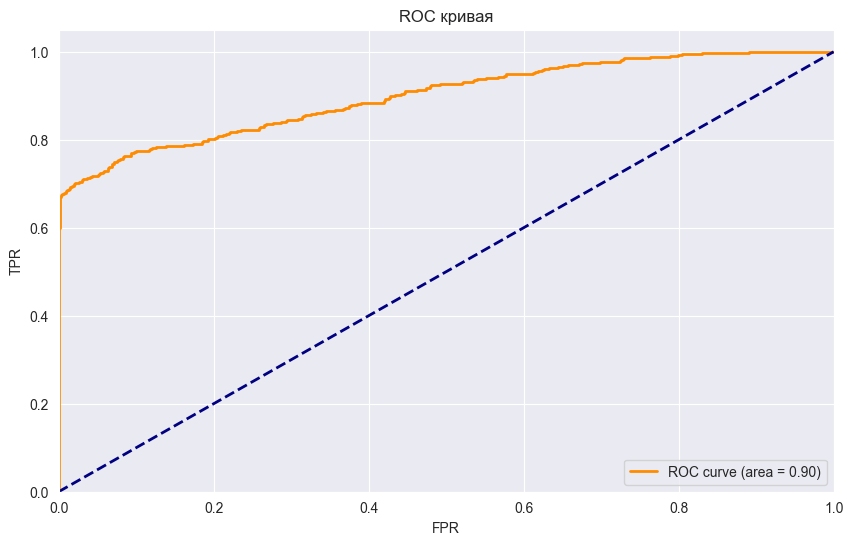

In [32]:
from sklearn.metrics import roc_curve, auc

proba = pred_proba['class_1']
true = pred_proba['true_class']
fpr, tpr, _ = roc_curve(true, proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC кривая')
plt.legend(loc="lower right")
plt.show()

In [33]:
def recall_at_k(table, y_true_cls, y_pred_cls, y_cls_proba, cls, k=1000, average='None'):
    table_cut = table.sort_values(by=[y_cls_proba], ascending=False)[:k]
    return (table_cut[y_true_cls] == cls).sum() / (table[y_true_cls] == cls).sum()


def precision_at_k(table, y_true_cls, y_pred_cls, y_cls_proba, cls, k=1000, average='None'):
    table_cut = table.sort_values(by=[y_cls_proba], ascending=False)[:k]
    return (table_cut[y_true_cls] == cls).sum() / len(table_cut)


def f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall)

In [34]:
def make_report(model_name,
                table,
                cls,
                percentages,
                y_true_cls,
                y_pred_cls,
                y_cls_proba):
    report_test_top = pd.DataFrame(
        columns=[
            "model",
            "class",
            "top",
            "count",
            "f1-score@top",
            "recall@top",
            "precision@top",
            "lift@top"
        ])

    counts = [round(p * table.shape[0] / 100) for p in percentages]
    coef = len(table[table[y_true_cls] == 1]) / len(table)

    for p, count in zip(percentages, counts):
        recall_k = recall_at_k(table, y_true_cls, y_pred_cls, y_cls_proba, cls, k=count)
        precision_k = precision_at_k(table, y_true_cls, y_pred_cls, y_cls_proba, cls, k=count)

        report_test_top = report_test_top.append(
            {
                "model": model_name,
                "class": cls,
                "count": count,
                "top": str(p) + "%",
                "f1-score@top": f1_score(recall_k, precision_k),
                "recall@top": recall_k,
                "precision@top": precision_k,
                "lift@top": precision_k / coef
            },
            ignore_index=True,
        )

    return report_test_top

In [35]:
out = make_report('test', pred_proba, 1, [1, 2, 3, 4, 5, 10, 20, 21, 22, 23, 24, 25, 27, 30, 40, 50, 100], 'true_class',
                  'predicted_class',
                  'class_1')

C:\Users\zloif\AppData\Local\Temp\ipykernel_6964\4233328945.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report_test_top = report_test_top.append(
C:\Users\zloif\AppData\Local\Temp\ipykernel_6964\4233328945.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report_test_top = report_test_top.append(
C:\Users\zloif\AppData\Local\Temp\ipykernel_6964\4233328945.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report_test_top = report_test_top.append(
C:\Users\zloif\AppData\Local\Temp\ipykernel_6964\4233328945.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report_test_top = report_test_top.append(
C:\Users\zloif\AppData\L

In [36]:
out

,model,class,top,count,f1-score@top,recall@top,precision@top,lift@top
0,test,1,1%,20,0.073394,0.038095,1.000000,3.771429
1,test,1,2%,40,0.141593,0.076190,1.000000,3.771429
2,test,1,3%,59,0.202055,0.112381,1.000000,3.771429
3,test,1,4%,79,0.261589,0.150476,1.000000,3.771429
4,test,1,5%,99,0.317308,0.188571,1.000000,3.771429
5,test,1,10%,198,0.547718,0.377143,1.000000,3.771429
6,test,1,20%,396,0.796960,0.699048,0.926768,3.495238
7,test,1,21%,416,0.790648,0.708571,0.894231,3.372527
8,test,1,22%,436,0.782518,0.716190,0.862385,3.252425
9,test,1,23%,455,0.773469,0.721905,0.832967,3.141476


In [37]:
pred_proba.true_class.value_counts()

0    1455
1     525
Name: true_class, dtype: int64

In [38]:
y_train.value_counts(normalize=1)

0    0.725084
1    0.274916
Name: target, dtype: float64

# Простой отчет о модельке
Из полученных результатов можно увидеть, что модель на тесте при определении 1 класса выдает достаточно неплохие результаты.
Так как нам известно распределение 1 на трейне где их доля примерно равна 27% от общего числа наблюдений ->
Берем для скора 27% лучших вероятностей и видим, что определяются ~76% всех 1 из теста (rec), а в общем в 1 попало ~75% истинных 1 (pre).
В числах мы определили 399 1 из всего тестового набора (525) как 1
и ещё 136 0 попало в 1

*Чисто мои соображения по таргету*
Если речь тут идет о кредитах потому что другого варианта для МФО у меня нет. лучше будет кншн использовать 20-22% скоров если речь идет о несении убытков в случае неуплаты заемщиком. Потому что в числах мы определяем не сильно меньше но при этом попадаем на 92% в 1. Все зависит опять же от таргета и это только предположения


In [39]:
import shap

In [40]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_valid)

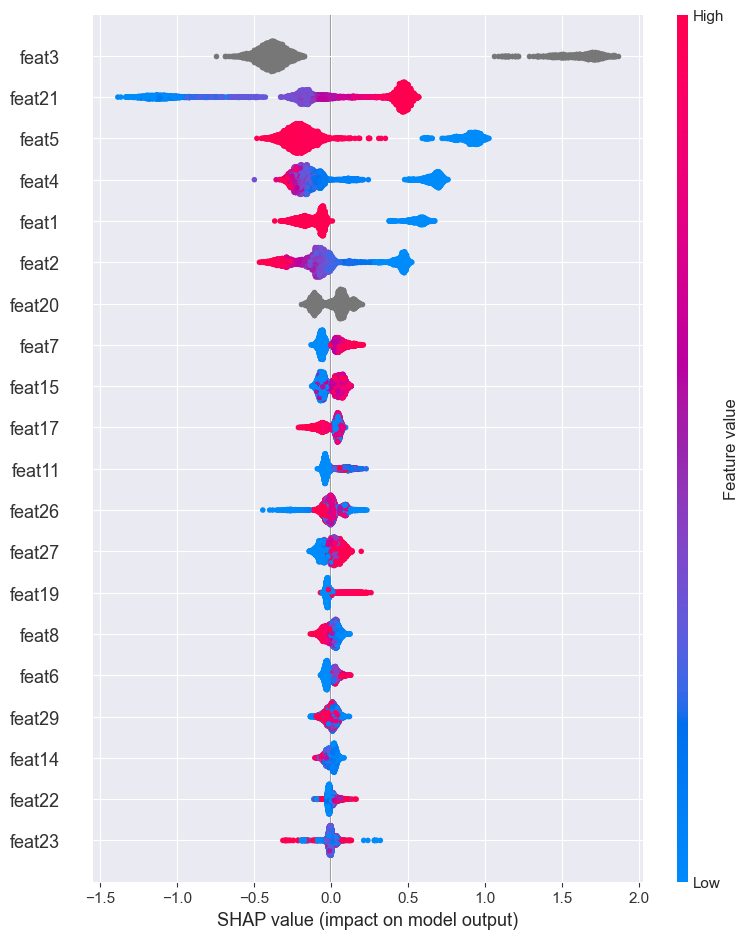

In [41]:
shap.summary_plot(shap_values, X_valid)

# Интерпретация
Тут наверное стоит сказать что есть предположения по фичам, и как влияют.
По шапам видно что пропуски в значениях 1 и 5 фичей заполненные -999 дают большой прирост для 1 класса. А остальные значения уводят в 0
Так же чем больше значение 21 фичи тем модель более склонна к 1 классу.
фичи 2, 4 примерно схожая картина с 1,5 чем меньше значение признака тем более склонна можнль к 1.
ну и аналогично дальше

# Тут предположение по фичам
Исходя из предпосылок о том что это должно быть связано с МФО
Есть сильное ощущение, что feat21 это число дней на которое берется займ. потому что его значение лежит в пределах от 7 до 30
фичи 3 и 20 это текущая занятость и уровень образования судя по их содержимому
Фича 5 похожа на возраст клиента её распределение оч схоже с этим и значения идут от 18 до 70 с небольшим
Фича 2 похожа на сумму займа или чет подобное
Фича 4 так же какая-то финансовая судя по значениям при этом они меньше чем у 2 и возможно как-то связаны друг с другом этот момент не совсем уловил

In [42]:
feature_importances = model.get_feature_importance()
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
2,feat3,12.179871
4,feat5,12.050847
18,feat21,10.914400
3,feat4,10.102157
0,feat1,6.715124
1,feat2,5.959806
17,feat20,3.433420
23,feat26,3.113447
24,feat27,2.631590
13,feat15,2.600309


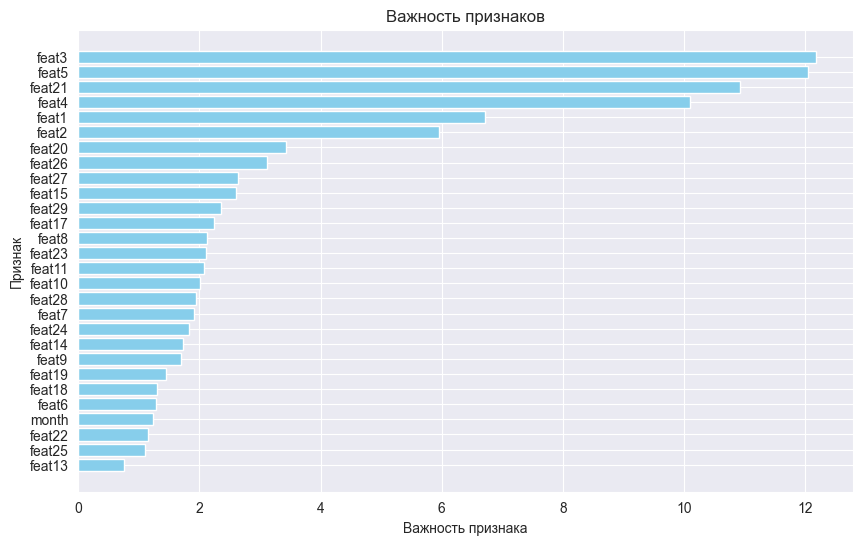

In [43]:
feature_names = [col for col in feature_importance_df.columns]
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков')
plt.gca().invert_yaxis()
plt.show()

Исходя из наличия малого числа признаков думаю их все можно оставить
Не особо вижу смысл в оставлении месяца, но пусть будет, не даты же пихать верно)

# Дальше будет регрессия
В принципе все то же самое с предобработкой ничего не менял

In [44]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [45]:
data['target2'].describe()

count    19996.000000
mean      2486.996949
std       4320.695801
min      -4998.000000
25%      -1257.250000
50%       2467.000000
75%       6249.000000
max      10000.000000
Name: target2, dtype: float64

In [46]:
data['target2'].mean()

2486.996949389878

In [47]:
X = data.drop(['target', 'target2', 'date'], axis=1)
y = data['target2']

In [48]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=111)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.33, random_state=111)

In [49]:
train_pool = Pool(X_train, y_train, cat_features=['feat3', 'feat20', 'month'])
valid_pool = Pool(X_valid, y_valid, cat_features=['feat3', 'feat20', 'month'])
test_pool = Pool(X_test, y_test, cat_features=['feat3', 'feat20', 'month'])

In [50]:
space_tree = {
    'depth': hp.quniform('depth', 4, 10, 1),
    'l2_leaf_reg': hp.loguniform('l2_leaf_reg', np.log(1), np.log(10)),
    'min_child_samples': hp.quniform('min_child_samples', 1, 20, 1),
    'border_count': hp.quniform('border_count', 32, 255, 1)
}

In [51]:
def objective_tree(params):
    model = CatBoostRegressor(
        iterations=100,
        depth=int(params['depth']),
        l2_leaf_reg=params['l2_leaf_reg'],
        min_child_samples=int(params['min_child_samples']),
        border_count=int(params['border_count']),
        verbose=0
    )
    model.fit(train_pool, eval_set=valid_pool)
    y_pred = model.predict(X_valid)
    mse = mean_squared_error(y_valid, y_pred)

    return mse

In [52]:
trials_tree = Trials()
best_tree = fmin(fn=objective_tree, space=space_tree, algo=tpe.suggest, max_evals=50, trials=trials_tree)

100%|██████████| 50/50 [01:29<00:00,  1.79s/trial, best loss: 18666841.918703686]


In [53]:
space_general = {
    'iterations': hp.quniform('iterations', 100, 1000, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.3)),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
}

In [54]:
def objective_general(params):
    np.random.seed(111)
    model = CatBoostRegressor(
        iterations=int(params['iterations']),
        learning_rate=params['learning_rate'],
        subsample=params['subsample'],
        depth=int(best_tree['depth']),
        l2_leaf_reg=best_tree['l2_leaf_reg'],
        border_count=int(best_tree['border_count']),
        verbose=0
    )
    model.fit(train_pool, eval_set=valid_pool)
    y_pred = model.predict(X_valid)
    mse = mean_squared_error(y_valid, y_pred)
    return mse

In [55]:
trials_general = Trials()
best_general = fmin(fn=objective_general, space=space_general, algo=tpe.suggest, max_evals=25, trials=trials_general)

100%|██████████| 25/25 [03:32<00:00,  8.50s/trial, best loss: 18665105.92583981] 


In [61]:
model = CatBoostRegressor(**best_general, **best_tree)
model.fit(train_pool, eval_set=valid_pool)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

0:	learn: 4312.5220617	test: 4321.6252306	best: 4321.6252306 (0)	total: 21.1ms	remaining: 4.7s
1:	learn: 4311.4597089	test: 4321.9894870	best: 4321.6252306 (0)	total: 42.2ms	remaining: 4.68s
2:	learn: 4310.3655210	test: 4321.8294280	best: 4321.6252306 (0)	total: 65.4ms	remaining: 4.82s
3:	learn: 4309.2576671	test: 4322.0069984	best: 4321.6252306 (0)	total: 87.7ms	remaining: 4.82s
4:	learn: 4307.9897077	test: 4321.8966533	best: 4321.6252306 (0)	total: 112ms	remaining: 4.92s
5:	learn: 4307.6101215	test: 4321.7813605	best: 4321.6252306 (0)	total: 128ms	remaining: 4.65s
6:	learn: 4305.3787670	test: 4321.6014010	best: 4321.6014010 (6)	total: 146ms	remaining: 4.52s
7:	learn: 4303.4523066	test: 4320.9419692	best: 4320.9419692 (7)	total: 164ms	remaining: 4.44s
8:	learn: 4302.2599240	test: 4320.7234679	best: 4320.7234679 (8)	total: 182ms	remaining: 4.34s
9:	learn: 4301.2180082	test: 4320.5261808	best: 4320.5261808 (9)	total: 200ms	remaining: 4.28s
10:	learn: 4299.6576616	test: 4320.3131745	best

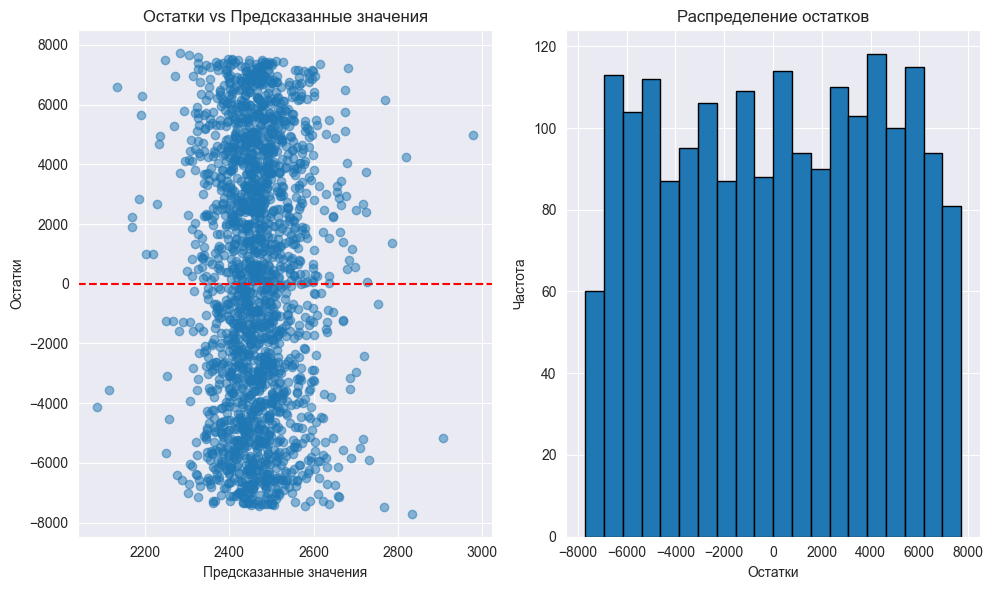

In [62]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Остатки vs Предсказанные значения')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Распределение остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

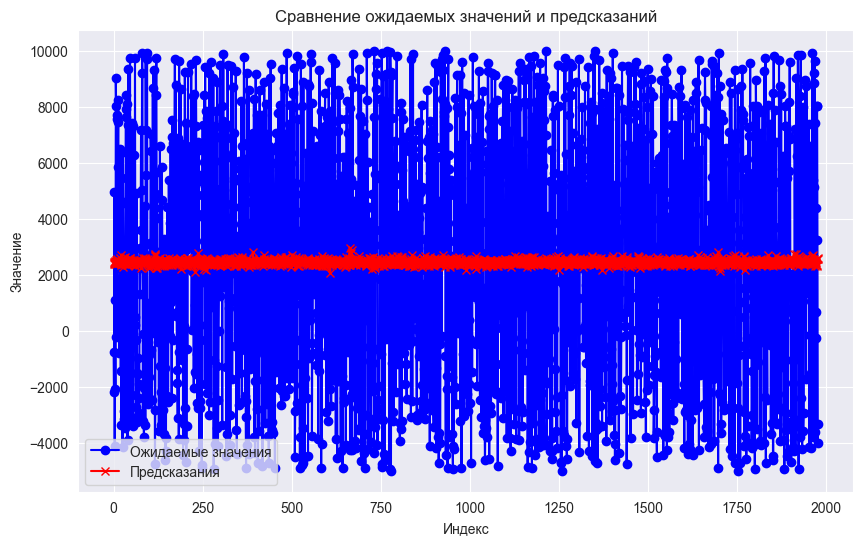

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Ожидаемые значения', color='blue', linestyle='-', marker='o')
plt.plot(y_pred, label='Предсказания', color='red', linestyle='-', marker='x')

plt.title('Сравнение ожидаемых значений и предсказаний')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

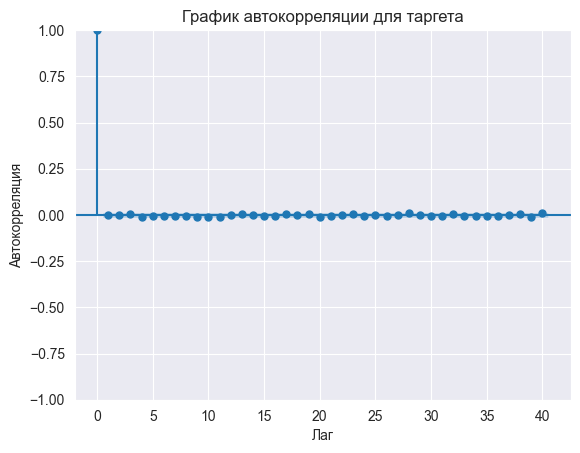

In [66]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(data['target2'], lags=40, alpha=0.05)
plt.title('График автокорреляции для таргета')
plt.xlabel('Лаг')
plt.ylabel('Автокорреляция')
plt.grid(True)
plt.show()

С регрессией не получилось добиться чего-то дельного
Микро вывод есть связанный с тем, что нет никакой зависимости между фичами и таргетом 2.
По всем параметрам данный таргет представляет собой БШ, который никак не связан с текущими фичами и лучшим выбором модели остается предсказание значений близких к среднему

---
# Ну и тут немного по фичам и почему я такими их предположил чуть ниже шапов

### Повторение того, что было выше возле шапов
Исходя из предпосылок о том что это должно быть связано с МФО
Есть сильное ощущение, что feat21 это число дней на которое берется займ. потому что его значение лежит в пределах от 7 до 30
фичи 3 и 20 это текущая занятость и уровень образования судя по их содержимому
Фича 5 похожа на возраст клиента её распределение оч схоже с этим и значения идут от 18 до 70 с небольшим
Фича 2 похожа на сумму займа или чет подобное
Фича 4 так же какая-то финансовая судя по значениям при этом они меньше чем у 2 и возможно как-то связаны друг с другом этот момент не совсем уловил

### Фича 5 будто бы 1 в 1 распределена как возраст

<Axes: >

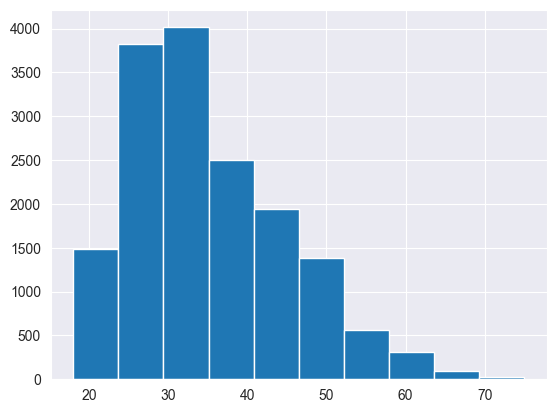

In [70]:
data[data.feat5 != -999].feat5.hist()

В принципе схоже
![image](https://habrastorage.org/webt/yc/ud/1q/ycud1qvqzo3chilplfx9uh7pynw.jpeg)

По 21

In [72]:
data.feat21.value_counts().sort_index(ascending=True)

-999.0     227
 7.0      1501
 8.0       197
 9.0       156
 10.0      446
 11.0      185
 12.0      219
 13.0      220
 14.0      375
 15.0     3678
 16.0      499
 17.0      288
 18.0      269
 19.0      156
 20.0      786
 21.0      421
 22.0      168
 23.0      111
 24.0      104
 25.0      195
 26.0      114
 27.0      106
 28.0      209
 29.0      373
 30.0     8993
Name: feat21, dtype: int64

Тут опять же выбиваются значения 7, 10, 14, 15, 20, 21, 30

В этих 2х и ещё в категориальных думаю уверен, остальные предположенны на уровне интуиции (2 и 4)
Можно ещё сказать и о других но это будет просто палец в небо)